In [9]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#PreTrained Model
from tensorflow.keras.applications import *
#Image Generator DataAugmentation
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")
#Splitting Data 
# import splitfolders
from tensorflow.keras.preprocessing import image_dataset_from_directory
import random
from sklearn.cluster import KMeans
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

In [22]:
directory = "/kaggle/input/paddydoctor/train_images"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
        
#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [23]:
df_train.head()

,filepath,label
0,/kaggle/input/paddydoctor/train_images/tungro/...,tungro
1,/kaggle/input/paddydoctor/train_images/tungro/...,tungro
2,/kaggle/input/paddydoctor/train_images/tungro/...,tungro
3,/kaggle/input/paddydoctor/train_images/tungro/...,tungro
4,/kaggle/input/paddydoctor/train_images/tungro/...,tungro


In [24]:
from sklearn. model_selection import train_test_split
train_df , val_df = train_test_split(df_train ,train_size = 0.9 , shuffle = True ,random_state = 42 )

In [25]:
print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {val_df.shape}")

The shape of The Train data is: (9366, 2)
The shape of The Validation data is: (1041, 2)


In [26]:
data_dir = '/kaggle/input/paddydoctor/train_images'

print('Training Images:')
# creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.4,
    subset='training',
    seed=123,
    image_size=(256, 256),
    batch_size=128)

#Testing Augmented Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.4,
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=128)

Training Images:
Found 10407 files belonging to 10 classes.
Using 6245 files for training.
Validation Images:
Found 10407 files belonging to 10 classes.
Using 4162 files for validation.


In [27]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/paddydoctor/test_images',
    batch_size = 128,
    image_size = (256, 256),
    label_mode = None,
    shuffle=False
)
test_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

Found 3469 files.


In [28]:
class_names = train_ds.class_names


# Print the class indices
print("Class indices for training generator:", class_names)

Class indices for training generator: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [29]:
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (128, 256, 256, 3)
Shape of y_train:  (128,)


In [30]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

In [31]:
DenseNet121_base = DenseNet121(weights='imagenet',
                                    include_top=False, 
                                   input_shape=(256, 256, 3),
                                     pooling = 'avg'
                                   )

# Freeze the pre-trained base model layers
DenseNet121_base.trainable = False

In [32]:
model = Sequential()

# Add the pre-trained DenseNet121_base 
model.add(DenseNet121_base)

# Batch Normalization
model.add(BatchNormalization())

#Dropout 
model.add(Dropout(0.35))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))

model.add(Dense(220, activation='relu'))


# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [34]:
early_stopping = EarlyStopping(
    patience=10, 
    restore_best_weights=True,
)

# Train the model 
history = model.fit(train_ds,
                    epochs=25,
                    validation_data=validation_ds,
                    callbacks=early_stopping)

Epoch 1/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 622ms/step - accuracy: 0.9000 - loss: 0.3354 - val_accuracy: 0.8546 - val_loss: 0.5058
Epoch 2/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 624ms/step - accuracy: 0.8993 - loss: 0.3108 - val_accuracy: 0.8811 - val_loss: 0.4178
Epoch 3/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 615ms/step - accuracy: 0.9202 - loss: 0.2752 - val_accuracy: 0.8849 - val_loss: 0.3982
Epoch 4/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 613ms/step - accuracy: 0.9222 - loss: 0.2494 - val_accuracy: 0.8842 - val_loss: 0.3995
Epoch 5/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 617ms/step - accuracy: 0.9297 - loss: 0.2247 - val_accuracy: 0.8650 - val_loss: 0.4725
Epoch 6/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 616ms/step - accuracy: 0.9268 - loss: 0.2259 - val_accuracy: 0.9022 - val_loss: 0.3678
Epoch 7/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 616ms/step - accuracy: 0.9355 - loss: 0.1999 - val_accuracy: 0.8952 - val_loss: 0.3870
Epoch 8/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 615ms/step - accuracy: 0.9411 - loss: 0.1983 - val_accu

In [35]:
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 340ms/step - accuracy: 0.9114 - loss: 0.3437
Validation Loss: 0.33957546949386597
Validation Accuracy: 0.9108601808547974


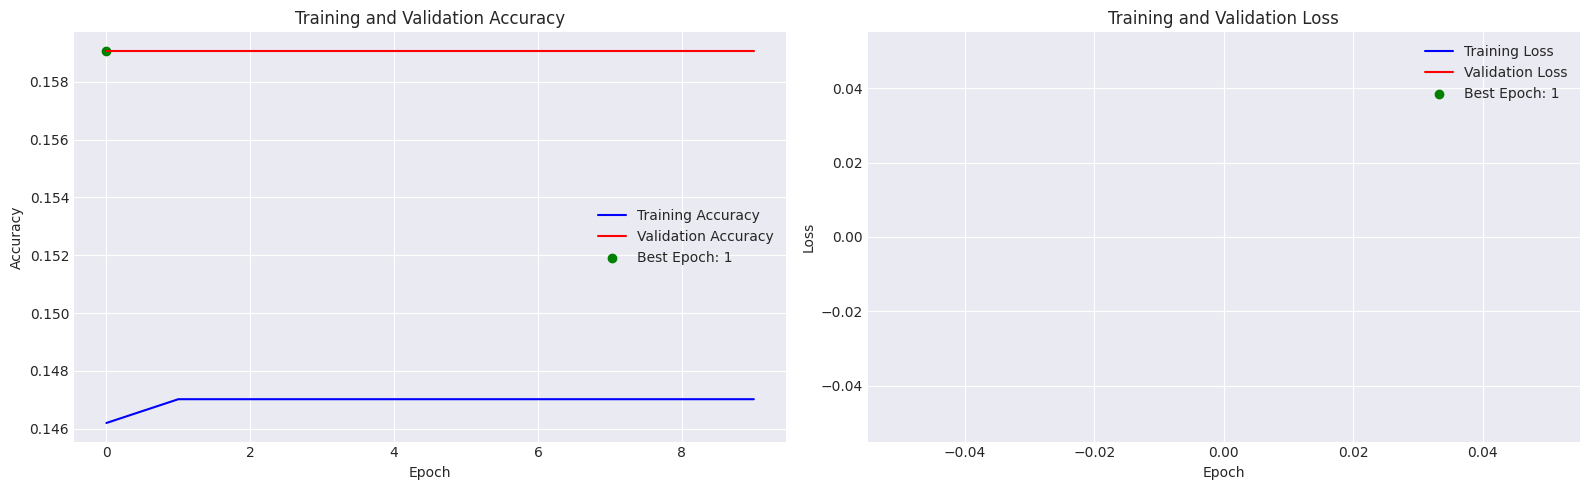

In [50]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [51]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         12 │ input_layer_6[0]… │
│ (BatchNormalizatio… │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ octave_conv2d_9     │ [(None, 256, 256, │      1,792 │ batch_normalizat… │
│ (OctaveConv2D)      │ 32), (None, 128,  │            │                   │
│                     │ 128, 32)]         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 128, 128,  │          0 │ octave_conv2d_9[… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 64, 64,    │          0 │ octave_conv2d_9[… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ octave_conv2d_10    │ [(None, 128, 128, │     18,496 │ max_pooling2d_13… │
│ (OctaveConv2D)      │ 16), (None, 64,   │            │ max_pooling2d_14… │
│                     │ 64, 16)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 64, 64,    │          0 │ octave_conv2d_10… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 32, 32,    │          0 │ octave_conv2d_10… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ octave_conv2d_11    │ [(None, 64, 64,   │      9,280 │ max_pooling2d_15… │
│ (OctaveConv2D)      │ 16), (None, 32,   │            │ max_pooling2d_16… │
│                     │ 32, 16)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 32, 32,    │          0 │ octave_conv2d_11… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 16, 16,    │          0 │ octave_conv2d_11… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ octave_conv2d_12    │ [(None, 32, 32,   │      9,280 │ max_pooling2d_17… │
│ (OctaveConv2D)      │ 16), (None, 16,   │            │ max_pooling2d_18… │
│                     │ 16, 16)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ octave_conv2d_13    │ (None, 32, 32,    │      4,640 │ octave_conv2d_12… │
│ (OctaveConv2D)      │ 16)               │            │ octave_conv2d_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 16, 16,    │          0 │ octave_conv2d_13… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4096)      │          0 │ max_pooling2d_19… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4096)      │     16,384 │ flatten_1[0][0] 

 Total params: 286,168 (1.09 MB)

 Trainable params: 92,656 (361.94 KB)

 Non-trainable params: 8,198 (32.02 KB)

 Optimizer params: 185,314 (723.89 KB)

In [4]:
import keras
import keras.backend as K
import numpy as np
from keras.layers import Input, BatchNormalization, MaxPool2D, Conv2D, Dropout, Flatten, Dense
from keras.models import Model
from keras_octave_conv import OctaveConv2D, octave_dual


In [5]:
inputs = Input(shape=(32, 32, 3))
conv = OctaveConv2D(filters=64, kernel_size=3)(inputs)

pool = octave_dual(conv, MaxPool2D())
conv = OctaveConv2D(filters=8, kernel_size=3, ratio_out=0.0)(pool)

pool = octave_dual(conv, MaxPool2D())
conv = OctaveConv2D(filters=4, kernel_size=3, ratio_out=0.0)(pool)

flatten = Flatten()(conv)
outputs = Dense(units=10, activation='softmax')(flatten)

model = Sequential()
modeloct = Model(inputs=inputs, outputs=outputs)
modeloct.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [6]:
modeloct.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ octave_conv2d       │ [(None, 32, 32,   │      1,792 │ input_layer[0][0] │
│ (OctaveConv2D)      │ 32), (None, 16,   │            │                   │
│                     │ 16, 32)]          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d-H     │ (None, 8, 8, 32)  │          0 │ octave_conv2d[0]… │
│ (MaxPooling2D)      │                   │            │ octave_conv2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d-L     │ (None, 8, 8, 32)  │          0 │ octave_conv2d[0]… │
│ (MaxPooling2D)      │                   │            │ octave_conv2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ octave_conv2d_1     │ (None, 16, 16, 8) │      4,624 │ max_pooling2d-H[… │
│ (OctaveConv2D)      │                   │            │ max_pooling2d-L[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1-H   │ (None, 8, 8, 8)   │          0 │ octave_conv2d_1[… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ octave_conv2d_2     │ (None, 8, 8, 4)   │        292 │ max_pooling2d_1-… │
│ (OctaveConv2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 256)       │          0 │ octave_conv2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │      2,570 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,278 (36.24 KB)

 Trainable params: 9,278 (36.24 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
data_dir = '/kaggle/input/paddydoctor/train_images'

print('Training Images:')
# creating the training dataset
train_ds1 = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(32, 32),
    batch_size=32)

#Testing Augmented Data
print('Validation Images:')
validation_ds1 = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=(32, 32),
    batch_size=32)

Training Images:
Found 10407 files belonging to 10 classes.
Using 9367 files for training.
Validation Images:
Found 10407 files belonging to 10 classes.
Using 1040 files for validation.


In [8]:
history_oct = modeloct.fit(train_ds1,
                    epochs=20,
                    validation_data=validation_ds1
                    )

Epoch 1/20
  3/293 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.0851 - loss: 133.4107

I0000 00:00:1710495966.157599     100 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


293/293 ━━━━━━━━━━━━━━━━━━━━ 45s 129ms/step - accuracy: 0.1621 - loss: 34.1592 - val_accuracy: 0.2481 - val_loss: 9.2043
Epoch 2/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.2718 - loss: 7.5222 - val_accuracy: 0.3087 - val_loss: 5.1013
Epoch 3/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.3445 - loss: 3.7550 - val_accuracy: 0.3212 - val_loss: 3.1867
Epoch 4/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.4062 - loss: 2.4416 - val_accuracy: 0.3942 - val_loss: 2.3674
Epoch 5/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4484 - loss: 1.9031 - val_accuracy: 0.4019 - val_loss: 2.1359
Epoch 6/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.4951 - loss: 1.6422 - val_accuracy: 0.4260 - val_loss: 1.8502
Epoch 7/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.5187 - loss: 1.4992 - val_accuracy: 0.4481 - val_loss: 1.7995
Epoch 8/20
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5391 - loss: 1.4058 - val_accur

In [88]:
validation_loss, validation_accuracy = modeloct.evaluate(validation_ds1)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5439 - loss: 2.0320
Validation Loss: 2.0685601234436035
Validation Accuracy: 0.5384615659713745
